# salary project:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("salaries.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:

df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


# scatterplot

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

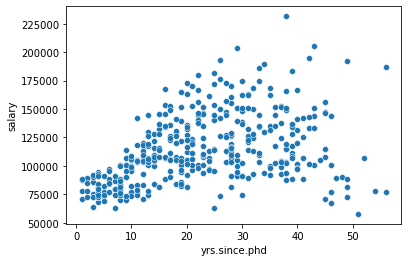

In [9]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

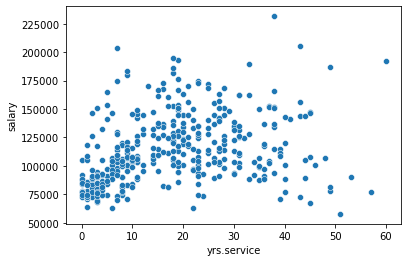

In [10]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

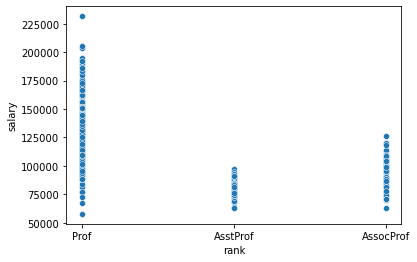

In [11]:
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

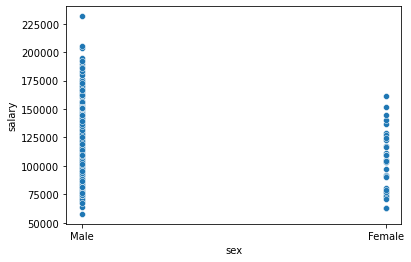

In [12]:
sns.scatterplot(x="sex",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

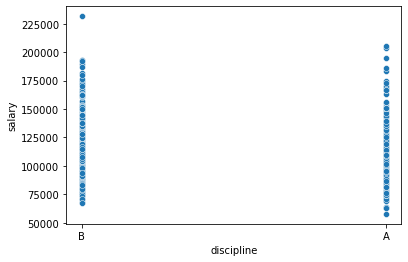

In [13]:
sns.scatterplot(x="discipline",y="salary",data=df)

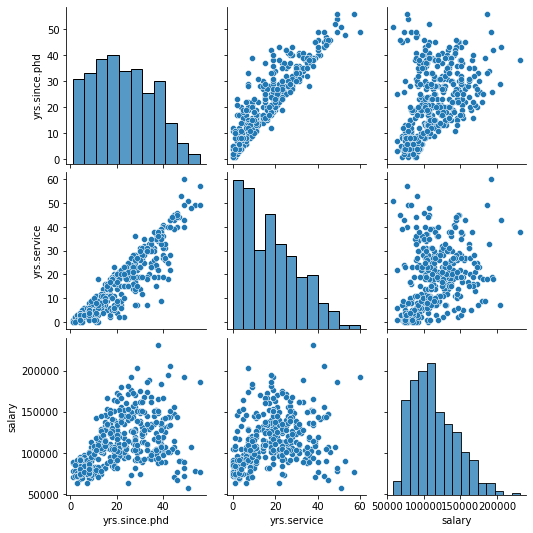

In [14]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig("pairplot.png")
plt.show()

# correlation:

In [15]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [16]:
df.corr()["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

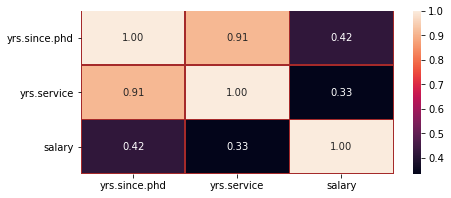

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="brown",fmt=".2f")

# describe datasets:

In [18]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# outliers checking:

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
enc = OrdinalEncoder()
enc.fit(df[["rank","discipline","sex"]])
df[["rank","discipline","sex"]] = enc.transform(df[["rank","discipline","sex"]])

In [22]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [23]:
import warnings
warnings.filterwarnings("ignore")

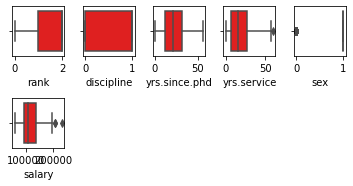

In [24]:
collist=df.columns.values
ncol=5
nrow=12
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="h")
    plt.tight_layout()

# skewness:

In [25]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

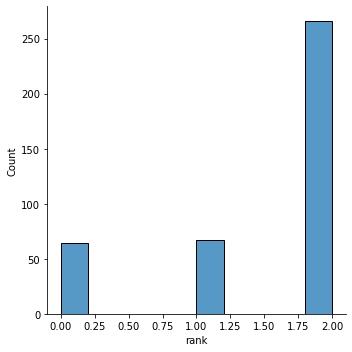

In [26]:
sns.displot(df["rank"])

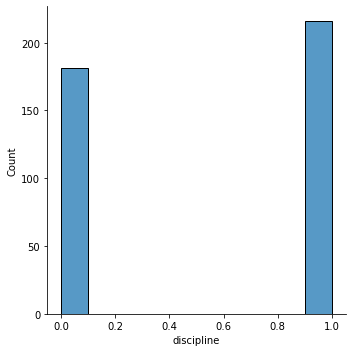

In [27]:
sns.displot(df["discipline"])

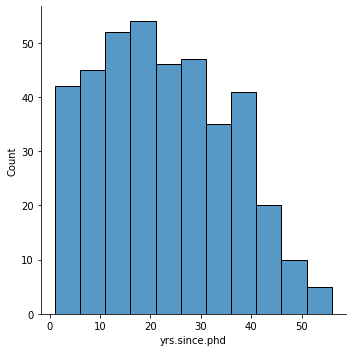

In [28]:
sns.displot(df["yrs.since.phd"])

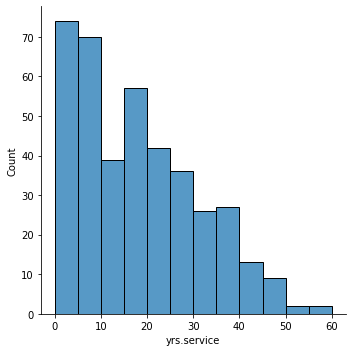

In [29]:
sns.displot(df["yrs.service"])

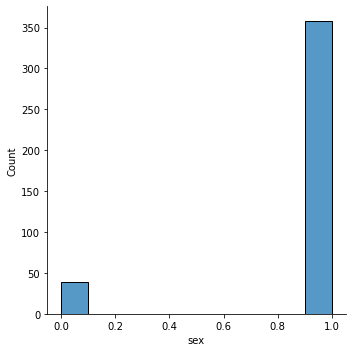

In [30]:
sns.displot(df["sex"])

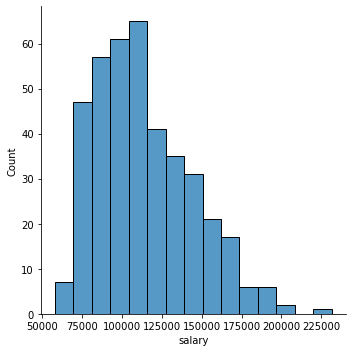

In [31]:
sns.displot(df["salary"])

# data cleaning:

In [32]:
df.corr()["salary"]

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

# removing outliers:

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 6)

In [34]:
type(z)

numpy.ndarray

In [35]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 396, 396, 396], dtype=int64), array([0, 1, 2, ..., 3, 4, 5], dtype=int64))


In [36]:
df.iloc[396]

rank                 1.0
discipline           0.0
yrs.since.phd        8.0
yrs.service          4.0
sex                  1.0
salary           81035.0
Name: 396, dtype: float64

In [37]:
len(np.where(z>3)[0])

43

In [38]:
df.drop([  0,   0,   0, 396, 396, 396],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
5,0.0,1.0,6,6,1.0,97000
...,...,...,...,...,...,...
391,2.0,0.0,30,19,1.0,151292
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738


In [39]:
df_new=df[(z<3).all(axis=1)]
print('old DataFrame', df.shape)
print('new DataFrame',df_new.shape)
print('total_dropped_rows',df.shape[0] - df_new.shape[0])

old DataFrame (397, 6)
new DataFrame (354, 6)
total_dropped_rows 43


# percentage data loss:

In [40]:
loss_percent=(397-354)/397*100
print(loss_percent,"%")

10.831234256926953 %


# model without outliers is df and model with desired outliers is df_new1:

In [41]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [42]:
x=df_new.iloc[:,:-1]

In [43]:
y=df_new.iloc[:,-1]

# transforming data to remove skewness:

In [44]:
from sklearn.preprocessing import power_transform

In [45]:
x=power_transform(x,method="yeo-johnson")

In [46]:
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

# outcome is showing only 2 variable then we will use binary classification

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score


# splitting the dataframe

In [49]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state",i,"The model performs very well")
    print("At random_state:-",i)
    print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 0 The model performs very well
At random_state:- 0
Training accuracy_score is:- 7.420494699646643
Testing accuracy_score is:- 0.0
At random state 1 The model performs very well
At random_state:- 1
Training accuracy_score is:- 7.420494699646643
Testing accuracy_score is:- 2.8169014084507045
At random state 2 The model performs very well
At random_state:- 2
Training accuracy_score is:- 7.420494699646643
Testing accuracy_score is:- 2.8169014084507045
At random state 3 The model performs very well
At random_state:- 3
Training accuracy_score is:- 7.420494699646643
Testing accuracy_score is:- 0.0
At random state 4 The model performs very well
At random_state:- 4
Training accuracy_score is:- 7.06713780918728
Testing accuracy_score is:- 1.4084507042253522
At random state 5 The model performs very well
At random_state:- 5
Training accuracy_score is:- 7.06713780918728
Testing accuracy_score is:- 1.4084507042253522
At random state 6 The model performs very well
At random_state:- 6

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=999)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

       72500       0.00      0.00      0.00       0.0
       73000       0.00      0.00      0.00       0.0
       74000       0.00      0.00      0.00       2.0
       77081       0.00      0.00      0.00       1.0
       78162       0.00      0.00      0.00       0.0
       80225       0.00      0.00      0.00       1.0
       81035       0.00      0.00      0.00       1.0
       81285       0.00      0.00      0.00       1.0
       81500       0.00      0.00      0.00       0.0
       81800       0.00      0.00      0.00       0.0
       82100       0.00      0.00      0.00       1.0
       83850       0.00      0.00      0.00       1.0
       83900       0.00      0.00      0.00       1.0
       84273       0.00      0.00      0.00       1.0
       86250       0.00      0.00      0.00       1.0
       88000       0.00      0.00      0.00       1.0
       88400       0.00      0.00      0.00       1.0
       88600       0.00    

# cross validation score for logistic regression

In [53]:
from sklearn.model_selection import cross_val_score

for i in range(2,5):
    
    lsscore = cross_val_score(lr,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",lsc*100)
    print('Accuracy score at ',i ,lr.score(x_train,y_train)*100)
    print("\n")    


At cv:- 2
Cross validation score is:- 2.2598870056497176
Accuracy score at  2 7.773851590106007


At cv:- 3
Cross validation score is:- 1.4124293785310735
Accuracy score at  3 7.773851590106007


At cv:- 4
Cross validation score is:- 2.5408580183861083
Accuracy score at  4 7.773851590106007




# the model with the outliers

# AUC ROC curve

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color= "orange",lw=10, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1],[0, 1],color="navy",lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True POsitive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

In [ ]:
type(z)